## Soft Margin Support Vector Machine

For hard margin svm, it only deals with linearly separable data. But in many cases, there will always be some singular points that make the data set to be non-linearly separated. Therefore, we need to use soft margin svm to address this issue.

Assuming that the training data isn't linearly separable, it means that some sample points do not meet the constraint that the function interval is greater than 1. The solution of soft margin svm here is to introduce a slack variable for each instance, so that the function interval plus the slack variable is greater than or equal to 1. 

Therefore, the soft margin svm can be formalized as a convex quadratic programming problem:
$$
\begin{gathered}
\min _{\overrightarrow{\mathbf{w}}, b, \vec{\xi}} \frac{1}{2}\|\overrightarrow{\mathbf{w}}\|_{2}^{2}+C \sum_{i=1}^{N} \xi_{i} \\
\text { s.t. } \enspace \tilde{y}_{i}\left(\overrightarrow{\mathbf{w}} \cdot \overrightarrow{\mathbf{x}}_{i}+b\right) \geq 1-\xi_{i}, \quad i=1,2, \cdots, N \\
\xi_{i} \geq 0, \quad i=1,2, \cdots, N
\end{gathered}
$$

In the objective function above, $C \ge 0$ is a penalty parameter, indicating the penalty degree for misclassification. Minimizing the objective function can contain two meanings: to maximize the interval and minimize the number of misclassified data points, and $C$ is the harmonic coefficient of these two.

Now let's look at the dual problem of soft margin svm. First define the Lagrangian function as follows:
$$
\begin{gathered}
L(\overrightarrow{\mathbf{w}}, b, \vec{\xi}, \vec{\alpha}, \vec{\mu})=\frac{1}{2}\|\overrightarrow{\mathbf{w}}\|_{2}^{2}+C \sum_{i=1}^{N} \xi_{i}-\sum_{i] 1}^{N} \alpha_{i}\left[\tilde{y}_{i}\left(\overrightarrow{\mathbf{w}}_{i} \cdot \overrightarrow{\mathbf{x}}_{i}+b\right)-1+\xi_{i}\right]-\sum_{i=1}^{N} \mu_{i} \xi_{i} \\
\alpha_{i} \geq 0, \enspace \mu_{i} \geq 0
\end{gathered}
$$

Because the dual problem is the minimax problem of Lagrangian functions. Find partial derivatives for $\vec{\mathbf{w}}$, $b$ and $\vec{\xi_{i}}$ based on this Lagrangian function:
$$
\begin{gathered}
\nabla_{\overrightarrow{\mathbf{w}}} L(\overrightarrow{\mathbf{w}}, b, \vec{\xi}, \vec{\alpha}, \vec{\mu})=\overrightarrow{\mathbf{w}}-\sum_{i=1}^{N} \alpha_{i} \tilde{y}_{i} \overrightarrow{\mathbf{x}}_{i}=\overrightarrow{\mathbf{0}} \\
\nabla_{b} L(\overrightarrow{\mathbf{w}}, b, \vec{\xi}, \vec{\alpha}, \vec{\mu})=-\sum_{i=1}^{N} \alpha_{i} \tilde{y}_{i}=0 \\
\nabla_{\xi_{i}} L(\overrightarrow{\mathbf{w}}, b, \vec{\xi}, \vec{\alpha}, \vec{\mu})=C-\alpha_{i}-\mu_{i}=0 \\
\end{gathered}
$$

From the above three equations, the following three can be obtained:
$$
\begin{gathered}
\overrightarrow{\mathbf{w}}=\sum_{i=1}^{N} \alpha_{i} \tilde{y}_{i} \overrightarrow{\mathbf{x}}_{i} \\
\sum_{i=1}^{N} \alpha_{i} \tilde{y}_{i}=0 \\
C-\alpha_{i}-\mu_{i}=0
\end{gathered}
$$

Substitute the above three equations back into the Lagrangian function:
$$
\max _{\vec{\alpha}, \vec{\mu}} \min _{\overrightarrow{\mathrm{w}}, b, \vec{\xi}} L(\overrightarrow{\mathbf{w}}, b, \vec{\xi}, \vec{\alpha}, \vec{\mu})=\max _{\vec{\alpha}, \vec{\mu}}\left[-\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} \tilde{y}_{i} \tilde{y}_{j}\left(\overrightarrow{\mathbf{x}}_{i} \cdot \overrightarrow{\mathbf{x}}_{j}\right)+\sum_{i=1}^{N} \alpha_{i}\right]
$$

Then the dual problem of soft margin svm is obtained:
$$
\begin{gathered}
\min _{\vec{\alpha}} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} \tilde{y}_{i} \tilde{y}_{j}\left(\overrightarrow{\mathbf{x}}_{i} \cdot \overrightarrow{\mathbf{x}}_{j}\right)-\sum_{i=1}^{N} \alpha_{i} \\
s . t . \enspace \sum_{i=1}^{N} \alpha_{i} \tilde{y}_{i}=0 \\
0 \leq \alpha_{i} \leq C, \enspace i=1,2, \cdots, N
\end{gathered}
$$

According to the condition of KTT:
$$
\begin{gathered}
\nabla_{\overrightarrow{\mathbf{w}}} L\left(\overrightarrow{\mathbf{w}}^{*}, b^{*}, \vec{\xi}^{*}, \vec{\alpha}^{*}, \vec{\mu}^{*}\right)=\overrightarrow{\mathbf{w}}^{*}-\sum_{i=1}^{N} \alpha_{i}^{*} \tilde{y}_{i} \overrightarrow{\mathbf{x}}_{i}=\overrightarrow{\mathbf{0}} \\
\nabla_{b} L\left(\overrightarrow{\mathbf{w}}^{*}, b^{*}, \vec{\xi}^{*}, \vec{\alpha}^{*}, \vec{\mu}^{*}\right)=-\sum_{i=1}^{N} \alpha_{i}^{*} \tilde{y}_{i}=0 \\
\nabla_{\xi_{i}} L\left(\overrightarrow{\mathbf{w}}^{*}, b^{*}, \vec{\xi}^{*}, \vec{\alpha}^{*}, \vec{\mu}^{*}\right)=C-\alpha_{i}^{*}-\mu_{i}^{*}=0 \\
\alpha_{i}^{*}\left[\tilde{y}_{i}\left(\overrightarrow{\mathbf{w}}^{*} \cdot \overrightarrow{\mathbf{x}}_{i}+b^{*}\right)-1+\xi_{i}^{*}\right]=0 \\
\mu_{i}^{*} \xi_{i}^{*}=0 \\
\bar{y}_{i}\left(\overrightarrow{\mathbf{w}}^{*} \cdot \overrightarrow{\mathbf{x}}_{i}+b^{*}\right)-1+\xi_{i}^{*} \geq 0 \\
\xi_{i}^{*} \geq 0 \\
C \geq \alpha_{i}^{*} \geq 0 \\
\mu_{i}^{*} \geq 0 \\
i=1,2, \cdots, N
\end{gathered}
$$

The following equations are obtained through calculation:
$$
\begin{gathered}
\overrightarrow{\mathbf{w}}^{*}=\sum_{i=1}^{N} \alpha_{i}^{*} \tilde{y}_{i} \overrightarrow{\mathbf{x}}_{i} \\
b^{*}=\tilde{y}_{j}-\sum_{i=1}^{N} \alpha_{i}^{*} \tilde{y}_{i}\left(\overrightarrow{\mathbf{x}}_{i} \cdot \overrightarrow{\mathbf{x}}_{j}\right)
\end{gathered}
$$

In [48]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# generate sample data
def gen_non_lin_separable_data():
    mean1, mean2 = np.array([0, 2]), np.array([2, 0])
    cov = np.array([[1.5, 1.0], [1.0, 1.5]])
    X1 = np.random.multivariate_normal(mean1, cov, 100)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, 100)
    y2 = np.ones(len(X2)) * -1

    X_train = np.vstack((X1[:80], X2[:80]))
    y_train = np.hstack((y1[:80], y2[:80]))
    X_test = np.vstack((X1[80:], X2[80:]))
    y_test = np.hstack((y1[80:], y2[80:]))
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = gen_non_lin_separable_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(160, 2) (160,) (40, 2) (40,)


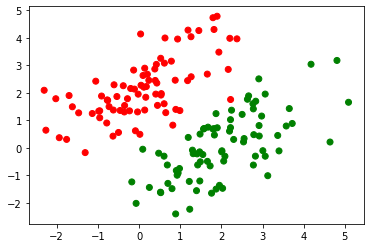

In [50]:
colors = {1:'r', -1:'g'}
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=pd.Series(y_train).map(colors))
plt.show()

In [51]:
# the training process of soft margin svm based on the cvxopt
def fit(X, y, C):
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = np.dot(X[i], X[j])

    P = cvxopt.matrix(np.outer(y, y) * K) 
    q = cvxopt.matrix(np.ones(n_samples) * -1) 
    A = cvxopt.matrix(y, (1, n_samples)) 
    b = cvxopt.matrix(0.0)

    if C is None:
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h = cvxopt.matrix(np.zeros(n_samples))
    else:
        tmp1 = np.diag(np.ones(n_samples) * -1)
        tmp2 = np.identity(n_samples)
        G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
        tmp1 = np.zeros(n_samples)
        tmp2 = np.ones(n_samples) * C
        h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    # solve QP problem
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    print("%d support vectors out of %d points" % (len(a), n_samples))

    # Intercept
    b = 0
    for i in range(len(a)):
        b += sv_y[i]
        b -+ np.sum(a * sv_y * K[ind[i], sv])
    b /= len(a)

    # Weight vector
    w = np.zeros(n_features)
    for n in range(len(a)):
        w += a[n] * sv_y[n] * sv_x[n]

    return w, b, sv_x

w, b, sv_x = fit(X_train, y_train, C=0.1)

def project(X):
    return np.dot(X, w) + b

def predict(X):
    return np.sign(project(X))

     pcost       dcost       gap    pres   dres
 0: -1.5277e+01 -2.6925e+01  8e+02  2e+01  8e-15
 1: -2.9180e+00 -2.4505e+01  6e+01  1e+00  6e-15
 2: -1.4315e+00 -9.4669e+00  1e+01  8e-02  1e-15
 3: -1.4265e+00 -2.6911e+00  1e+00  1e-02  2e-15
 4: -1.6546e+00 -2.0498e+00  4e-01  3e-03  1e-15
 5: -1.7423e+00 -1.8699e+00  1e-01  6e-04  1e-15
 6: -1.7731e+00 -1.8091e+00  4e-02  2e-04  1e-15
 7: -1.7847e+00 -1.7897e+00  5e-03  1e-05  1e-15
 8: -1.7868e+00 -1.7869e+00  6e-05  1e-07  1e-15
 9: -1.7868e+00 -1.7868e+00  6e-07  1e-09  1e-15
Optimal solution found.
28 support vectors out of 160 points


In [52]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test)
print('Accuracy of soft margin svm based on cvxopt: ', accuracy_score(y_test, y_pred))

Accuracy of soft margin svm based on cvxopt:  1.0


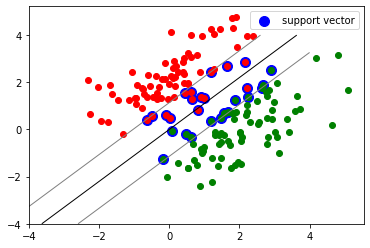

In [53]:
def plot_classifier(X1_train, X2_train):
    plt.plot(X1_train[:,0], X1_train[:,1], "ro")
    plt.plot(X2_train[:,0], X2_train[:,1], "go")
    plt.scatter(sv_x[:,0], sv_x[:,1], s=100, c="blue", edgecolors="b", label="support vector")

    X1, X2 = np.meshgrid(np.linspace(-4,4,50), np.linspace(-4,4,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = project(X).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.legend()
    plt.show()
    
plot_classifier(X_train[y_train==1], X_train[y_train==-1])